# Sparse Hebbian Learning 

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..No cache found probe/data_cache/data_data: Extracting data... Extracting data..bird08.png, yellowleaves39.png, rocky10.png, bittern62.png, flowerhill29.png, clouds43.png, goldwater67.png, calcoast09.png, yose05.png, woods54.png, koala52.png, bora04.png, flowers37.png, yose07.png, cattails70.png, hibiscus30.png, cucorn50.png, geyser27.png, reflection63.png, craterlake12.png, Data is of shape : (81920, 256) - done in 6.50s.
Data is of shape : (81920, 256) - done in 12.57s.
No cache found probe/data_cache/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  103 /   1024 (elapsed time:  88s,  1.0mn)
Iteration  206 /   1024 (elapsed time:  176s,  2.0mn)
Iteration  309 /   1024 (elapsed time:  265s,  4.0mn)
Iteration  412 /   1024 (elapsed time:  354s,  5.0mn)
Iteration  515 /   1024 (elapsed time:  441s,  7.0mn)
Iteration  618 /   1024 (elapsed time:  526s,  8.0mn)
Iteration

ValueError: setting an array element with a sequence.

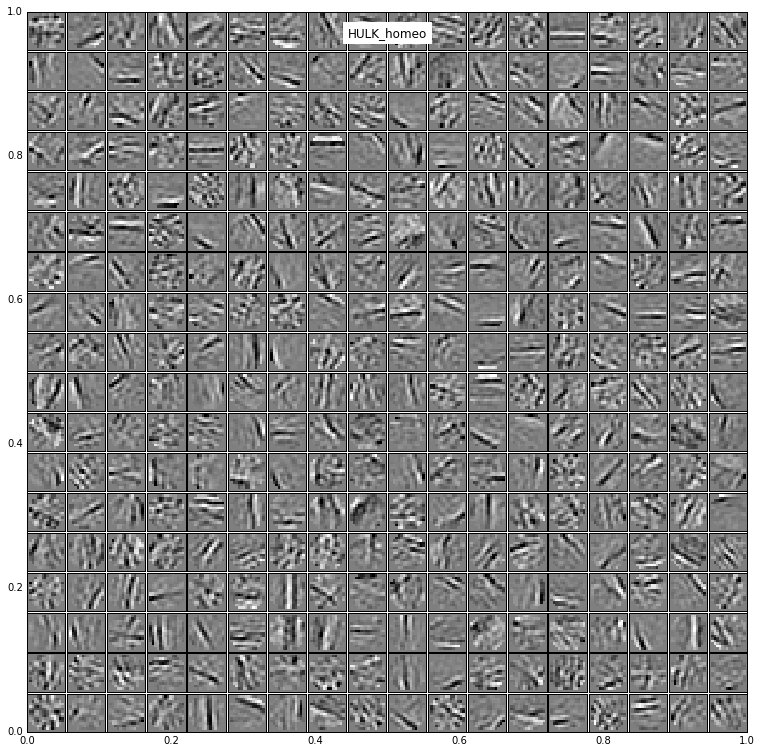

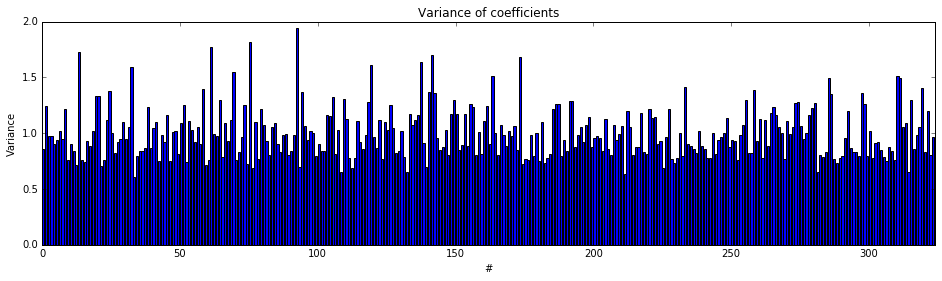

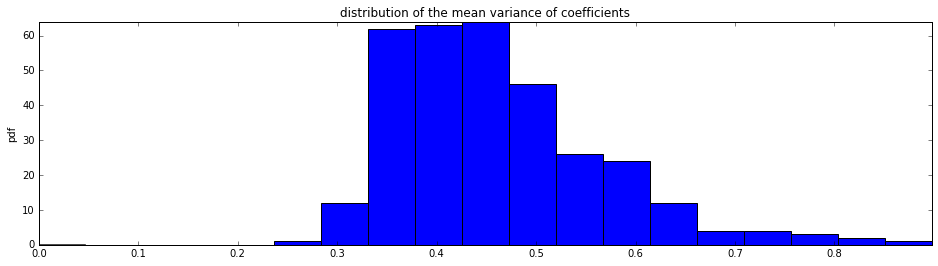

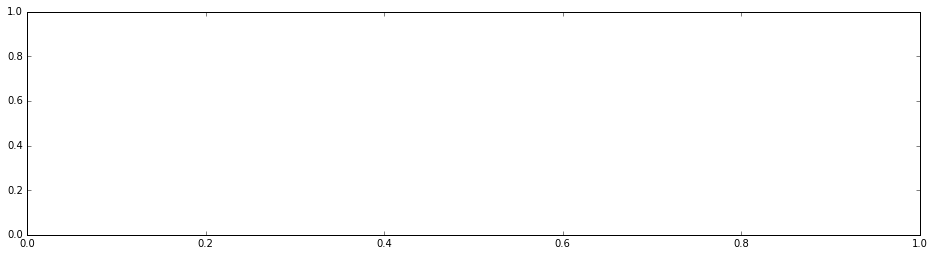

In [8]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
opts= dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, data_cache='probe/data_cache', datapath='probe/database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

In [ ]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [ ]:
!rm -fr probe/data_cache/{tag}*

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts